ANLP 2020/2021 final project  
Friederike Schreiber, Peng Chen, Anton Rabe  

This code calculates the Cosine Similarity for the four test conditions of the human study based on their word similarity.  
The test conditions are compared to each other and compared to themself.  
The result is that there is no significnat difference in the words used in either of the conditions nor is there a difference in the words used in each example in each test condition.

In [1]:
import pickle
from collections import Counter
import numpy as np
from scipy import spatial
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from random import randint

In [2]:
#Loading and processing data to get four lists with each 100 items. 

In [3]:
with open('../resources/mc_list.p', 'rb') as f:
    mc_list = pickle.load(f)
with open('../resources/twolyr_list.p', 'rb') as f:
    twolyr_list = pickle.load(f)
with open('../resources/random_list.p', 'rb') as f:
    random_list = pickle.load(f)
with open('../resources/verse.pkl', 'rb') as fb:
    verse_list = pickle.load(fb)    

In [4]:
#Get 100 random samples from the verse_list
real_list=[]
for i in range(100):

    num=randint(0,len(verse_list)-1)
 
    real_list.append(verse_list[num])

rl_list=[]
for j in real_list:
    a=' '.join(j)
    rl_list.append(a)

In [5]:
"""Get the freqeuncy and the inverted frequency of a word for each verse in a list of verses."""

def get_frequency(songs):  
    
    #get a list of all words and count them
    holds=[]

    for item in songs:
        holds.append(item)

    allsongs=' '.join(holds)

    allwords=allsongs.split()

    #count all words
    allwordcount=Counter(allwords)

    #print("Has list of all words")

    #split each song up in words
    wordssongs=[]
    for song in songs:
        hold=song.split()
        wordssongs.append(hold)

    songscount=[]
    for i in wordssongs:
        songscount.append(Counter(i))

    #print("Has list of words in songs")

    #calculates how often a word appears in each document

    freqall=[]

    for song in songscount:
        hold=[]

        #if word is in the song then lookup how often if not add 0
        for key in allwordcount:
            if key in song:
                val=song.get(key)
                hold.append(val)
            else:
                hold.append(0)

        freqall.append(hold) 

        
        
    #Calculations for inverse document frequency

    #calculates in how many documents each word appears
    nj=[]
    for key in allwordcount:
        has=0
        for song in songscount:
            if key in song:
                has=has+1
        nj.append(has)
    #print(nj)

    #the total number of documents
    N=len(songs)
    #print(N)

    #calculates the inverse document frequency for each word in each document
    allwij=[]
    for song in freqall:
        songfreq=[]
        for wordfreq,docfreq in zip(song,nj):
            wij=wordfreq*np.log(N/docfreq)
            songfreq.append(wij)
        allwij.append(songfreq)

    return freqall,allwij

In [6]:
"""Calculates the cosine similarity for the results"""
def get_results(freqall,allwij):
    #Calculate the cosine similarity with normal and inverted frequency

    results=cosine_similarity(freqall, freqall)
    results_infreq=cosine_similarity(allwij,allwij)


    #Reshape the results 
    freq=np.array(results)
    freq.shape=(len(results),len(results))

    infreq = np.array(results_infreq)
    infreq.shape=(len(results_infreq),len(results_infreq))

    #Show the results as a heatmap
    plt.imshow(infreq)
    plt.title("Inverted Frequency")
    plt.ylabel("Example Number")
    plt.xlabel("Example Number")
    clb=plt.colorbar()
    clb.ax.set_title('Similarity')
    plt.show()

    plt.imshow(freq)
    plt.title("Normal Frequency")
    plt.ylabel("Example Number")
    plt.xlabel("Example Number")
    clb=plt.colorbar()
    clb.ax.set_title('Similarity')
    plt.show()

The Inverted Cosine Frequency and Cosine Frequency for: All Compared


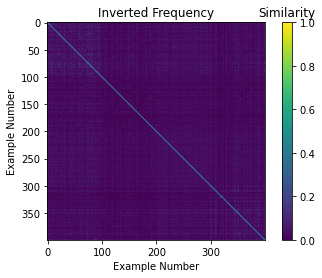

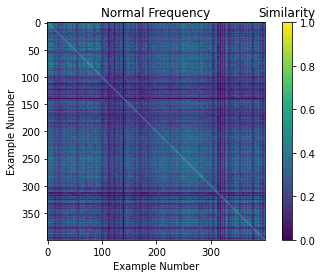

The Inverted Cosine Frequency and Cosine Frequency for: Two_layer Network


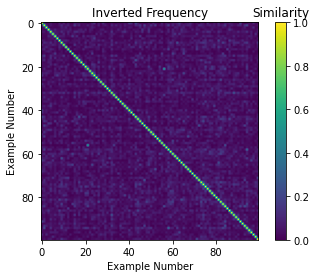

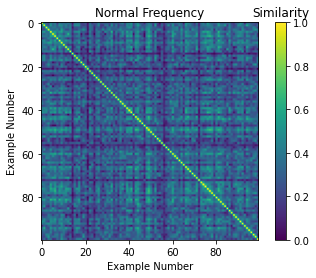

The Inverted Cosine Frequency and Cosine Frequency for: Markov Chain


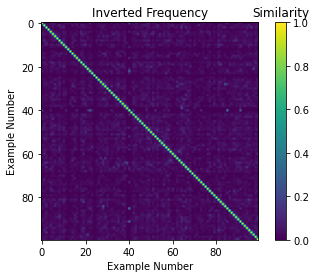

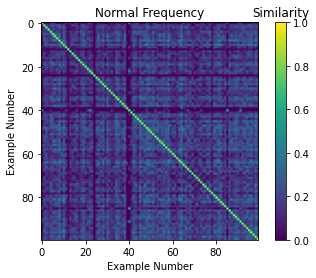

The Inverted Cosine Frequency and Cosine Frequency for: Random Text


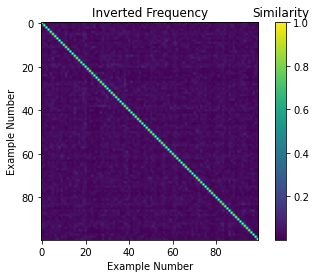

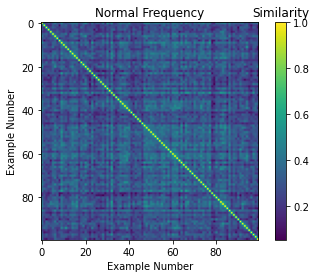

The Inverted Cosine Frequency and Cosine Frequency for: Real Text


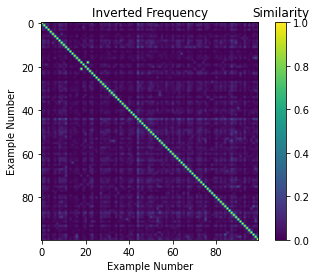

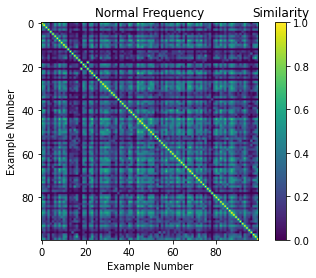

In [7]:
allverse=twolyr_list+mc_list+random_list+rl_list

names=["All Compared","Two_layer Network","Markov Chain","Random Text","Real Text"]
tries=[allverse,twolyr_list,mc_list,random_list,rl_list]

for lis,name in zip(tries,names):
    print("The Inverted Cosine Frequency and Cosine Frequency for:",name)
    freqall,allwij=get_frequency(lis)
    get_results(freqall,allwij)